In [72]:
import requests
from bs4 import BeautifulSoup
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scraping Amazon reviews

In [49]:
def get_soup(url):
    r = requests.get('http://localhost:8050/render.html', params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [50]:
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.com: Customer reviews:', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [51]:
reviewlist = []

In [52]:
prod_list = [
    'WEN-HB3185-18-Inch-Variable-Combination/product-reviews/B07MFMJ1CX',
    'WEN-6530-Electric-Planer-4-Inch/product-reviews/B00OW5AJTG',
    'Ryobi-18-Volt-Cordless-Planer-Packaged/product-reviews/B07Y2H9LF4',
    'Ryobi-Cordless-Brushless-Sander-P450/product-reviews/B06Y6FMBDV'
]

In [53]:
for link in prod_list:
    for x in range(1,50):
        soup = get_soup('https://www.amazon.com/%s/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=%s'%(link, x))
        get_reviews(soup)
        print(len(reviewlist))
        if not soup.find('li', {'class': 'a-disabled a-last'}):
            pass
        else:
            break

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
405
405
405
405
405
405
405
405
405
415
425
435
445
455
465
475
485
495
505
505
515
525
535
545
555
565
575
585
595
605
615
625
635
645
655
665
675
685
695
705
715
725
735
745
755
765
775
785
795
805
815
825
835
845
855
865
875
885
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
894
904
914
924
934
940


In [54]:
review_df = pd.DataFrame(reviewlist)

In [55]:
review_df.head()

,body,product,rating,title
0,This is a fairly good belt sander for the $50 ...,WEN HB3185 5-Amp 3-by-18-Inch Variable Speed C...,4.0,Strong Reliable Motor but Poor Dust Collection
1,~BACKGROUND~As a DIYer around the house I didn...,WEN HB3185 5-Amp 3-by-18-Inch Variable Speed C...,4.0,Basic Belt Sander - Great Value
2,Great belt sander for the money...tip for thos...,WEN HB3185 5-Amp 3-by-18-Inch Variable Speed C...,5.0,Great tip to hook sander up to your vacuum
3,I bought this belt sander as a starter when I ...,WEN HB3185 5-Amp 3-by-18-Inch Variable Speed C...,5.0,Still my sander.
4,"Great sander. My 3x21"" Craftsman finally died...",WEN HB3185 5-Amp 3-by-18-Inch Variable Speed C...,5.0,"Great sander. My 3x21"" Craftsman finally died ..."


In [57]:
with open('review.pickle', 'wb') as f:
    pickle.dump(review_df, f)

# EDA

In [58]:
with open('review.pickle', 'rb') as f:
    review = pickle.load(f)

In [71]:
review.groupby('product').agg({'title':'size', 'rating':'mean'}).rename(columns={'title':'count'}).reset_index()

,product,count,rating
0,Ryobi 18-Volt ONE+ Cordless 3-1/4 in. Planer P...,9,4.555556
1,Ryobi P450 One+ 18V Lithium Ion 3 x 18 inch Br...,46,4.043478
2,"WEN 6530 6-Amp Electric Hand Planer, 3-1/4-Inch",480,4.337500
3,WEN HB3185 5-Amp 3-by-18-Inch Variable Speed C...,405,3.982716


In [112]:
wen_hp = review[review['product'].str.contains('^WEN 6')]
wen_bs = review[review['product'].str.contains('^WEN H')]

## Rating distribution

In [91]:
def rate_hist(df):
    x = df.rating.value_counts()
    sns.barplot(x.index, x)
    plt.gca().set_ylabel('count')

Average rating for WEN Hand Planer is: 4.34


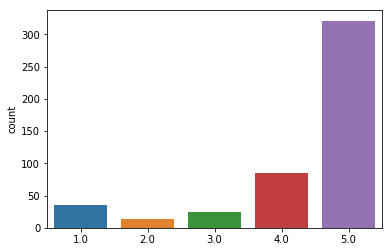

In [99]:
print('Average rating for WEN Hand Planer is:', round(wen_hp.rating.mean(), 2))
rate_hist(wen_hp)

Average rating for WEN Belt Sander is: 3.98


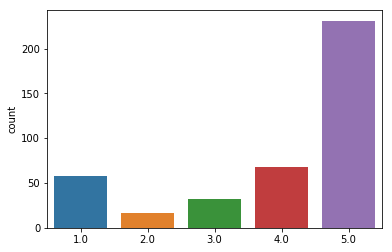

In [100]:
print('Average rating for WEN Belt Sander is:', round(wen_bs.rating.mean(), 2))
rate_hist(wen_bs)

## Word distribution

In [120]:
def word_dist(df):
    df_dist = df.copy()
    df_dist['word_len'] = df_dist['body'].str.len()
    print(df_dist.groupby('rating').agg({'word_len': 'median'}))

In [121]:
word_dist(wen_hp)

        word_len
rating          
1.0          292
2.0          293
3.0          337
4.0          248
5.0          230


In [122]:
word_dist(wen_bs)

        word_len
rating          
1.0        189.0
2.0        303.5
3.0        122.0
4.0        100.0
5.0         76.0


## Word cleaning

In [ ]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))